# Project Oh-Dance : Membuat Model NLP dengan TensorFlow

## Importing Required Libraries

In [239]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import re
import nltk
import string
import json
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from collections import defaultdict
from collections import Counter
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

Initialization Stopwords

In [4]:
nltk.download('stopwords')
stopwords_id = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mocha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading the data and getting basic idea

In [6]:
df_dataset = pd.read_csv('DatasetV0.1.csv')
# Check count of nulls in every column
# Reference: https://stackoverflow.com/a/57141046
df_dataset.isna().sum()

label      0
Kalimat    0
dtype: int64

In [7]:
# Remove row with null value
# Reference: https://stackoverflow.com/a/44548976
df_dataset = df_dataset.dropna(how='any',axis=0) 

In [8]:
df_dataset.isna().sum()

label      0
Kalimat    0
dtype: int64

In [9]:
df_dataset.info()
df_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    496 non-null    object
 1   Kalimat  496 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


,label,Kalimat
0,Tari Pakarena,Tari Pakarena merupakan salah satu kesenian tr...
1,Tari Pakarena,Properti utama yang digunakan oleh para penari...
2,Tari Pakarena,Tari Pakarena merupakan salah satu ikon kebuda...
3,Tari Pakarena,"Dalam pementasannya, tari pakarena dimainkan o..."
4,Tari Pakarena,"Pada masa lalu, Tari Pakarena dipertunjukkan s..."


## Class distribution

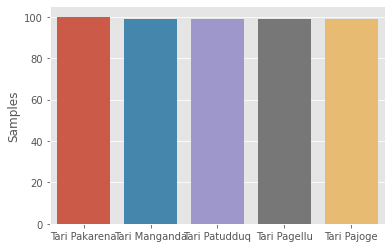

In [10]:
x = df_dataset.label.value_counts()
sns.barplot(x=x.index, y=x)
plt.gca().set_ylabel('Samples')
plt.show()

## Exploratory Data Analysis of Oh Dance Datasets

First, we will do very basic analysis, that is character level, word level and sentence level analysis.

### Number of characters in sentences

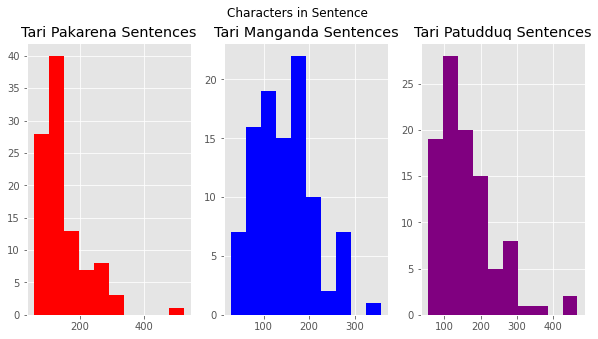

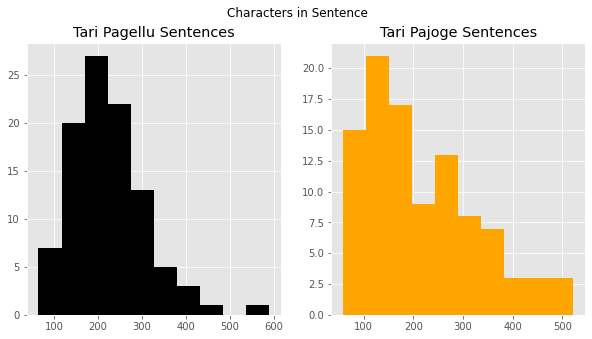

In [11]:
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
count_pakarena = df_dataset[df_dataset['label']=='Tari Pakarena']['Kalimat'].str.len()
ax1.hist(count_pakarena, color='red')
ax1.set_title('Tari Pakarena Sentences')

count_manganda = df_dataset[df_dataset['label']=='Tari Manganda']['Kalimat'].str.len()
ax2.hist(count_manganda, color='blue')
ax2.set_title('Tari Manganda Sentences')

count_patudduq = df_dataset[df_dataset['label']=='Tari Patudduq']['Kalimat'].str.len()
ax3.hist(count_patudduq, color='purple')
ax3.set_title('Tari Patudduq Sentences')
fig1.suptitle('Characters in Sentence')

fig2, (ax4, ax5) = plt.subplots(1, 2, figsize=(10, 5))
count_pagellu = df_dataset[df_dataset['label']=='Tari Pagellu']['Kalimat'].str.len()
ax4.hist(count_pagellu, color='black')
ax4.set_title('Tari Pagellu Sentences')

count_pajoge = df_dataset[df_dataset['label']=='Tari Pajoge']['Kalimat'].str.len()
ax5.hist(count_pajoge, color='orange')
ax5.set_title('Tari Pajoge Sentences')
fig2.suptitle('Characters in Sentence')

plt.show()



The distribution of 5 class seems to be almost same. 100 to 200 characters in a sentence are the most common.

### Number of words in sentence

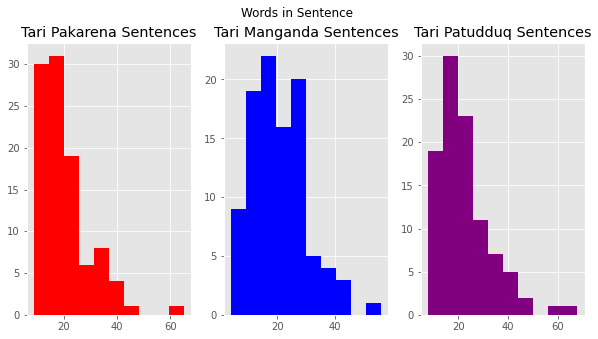

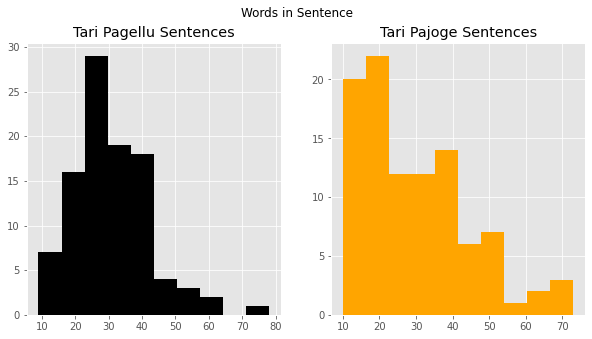

In [12]:
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
count_pakarena = df_dataset[df_dataset['label']=='Tari Pakarena']['Kalimat'].str.split().map(lambda x: len(x))
ax1.hist(count_pakarena, color='red')
ax1.set_title('Tari Pakarena Sentences')

count_manganda = df_dataset[df_dataset['label']=='Tari Manganda']['Kalimat'].str.split().map(lambda x: len(x))
ax2.hist(count_manganda, color='blue')
ax2.set_title('Tari Manganda Sentences')

count_patudduq = df_dataset[df_dataset['label']=='Tari Patudduq']['Kalimat'].str.split().map(lambda x: len(x))
ax3.hist(count_patudduq, color='purple')
ax3.set_title('Tari Patudduq Sentences')
fig1.suptitle('Words in Sentence')

fig2, (ax4, ax5) = plt.subplots(1, 2, figsize=(10, 5))
count_pagellu = df_dataset[df_dataset['label']=='Tari Pagellu']['Kalimat'].str.split().map(lambda x: len(x))
ax4.hist(count_pagellu, color='black')
ax4.set_title('Tari Pagellu Sentences')

count_pajoge = df_dataset[df_dataset['label']=='Tari Pajoge']['Kalimat'].str.split().map(lambda x: len(x))
ax5.hist(count_pajoge, color='orange')
ax5.set_title('Tari Pajoge Sentences')
fig2.suptitle('Words in Sentence')

plt.show()

### Average word length in a sentence

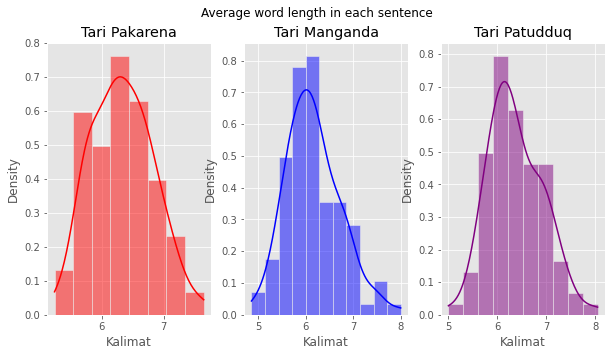

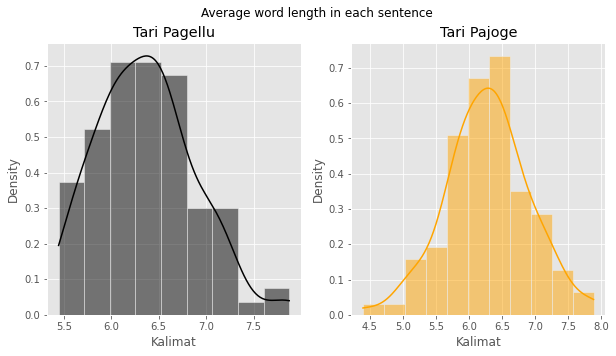

In [13]:
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
count_pakarena = df_dataset[df_dataset['label']=='Tari Pakarena']['Kalimat'].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(count_pakarena.map(lambda x: np.mean(x)), ax=ax1, kde=True, stat="density", color='red')
ax1.set_title('Tari Pakarena')

count_manganda = df_dataset[df_dataset['label']=='Tari Manganda']['Kalimat'].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(count_manganda.map(lambda x: np.mean(x)), ax=ax2, kde=True, stat="density", color='blue')
ax2.set_title('Tari Manganda')

count_patudduq = df_dataset[df_dataset['label']=='Tari Patudduq']['Kalimat'].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(count_patudduq.map(lambda x: np.mean(x)), ax=ax3, kde=True, stat="density", color='purple')
ax3.set_title('Tari Patudduq')
fig1.suptitle('Average word length in each sentence')

fig2, (ax4, ax5) = plt.subplots(1, 2, figsize=(10, 5))
count_pagellu = df_dataset[df_dataset['label']=='Tari Pagellu']['Kalimat'].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(count_pagellu.map(lambda x: np.mean(x)), ax=ax4, kde=True, stat="density", color='black')
ax4.set_title('Tari Pagellu')

count_pajoge = df_dataset[df_dataset['label']=='Tari Pajoge']['Kalimat'].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(count_pajoge.map(lambda x: np.mean(x)), ax=ax5, kde=True, stat="density", color='orange')
ax5.set_title('Tari Pajoge')
fig2.suptitle('Average word length in each sentence')

plt.show()

### Common stopwords in sentences

In [58]:
def create_corpus(label):
  corpus = []

  for list_words in df_dataset[df_dataset['label']==label]['Kalimat'].str.split():
    for word in list_words:
      corpus.append(word.lower())
  
  return corpus

First we will analyze sentences in each classes

In [59]:
def common_stopwords(label):
  corpus = create_corpus(label)

  dict_result = defaultdict(int)
  for word in corpus:
    if word in stopwords_id:
      dict_result[word] += 1

  top_result = sorted(dict_result.items(), key=lambda x : x[1], reverse=True)[:10] # Top Ten

  x, y = zip(*top_result)
  plt.bar(x, y)
  plt.title(label)
  plt.show()

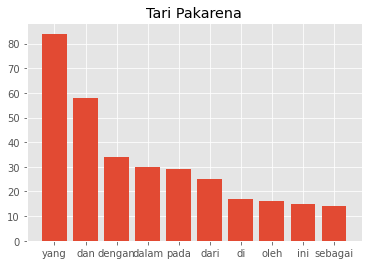

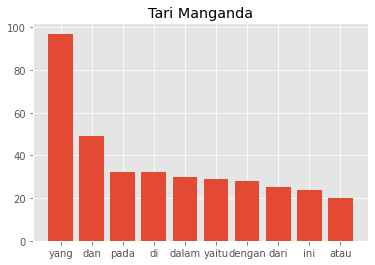

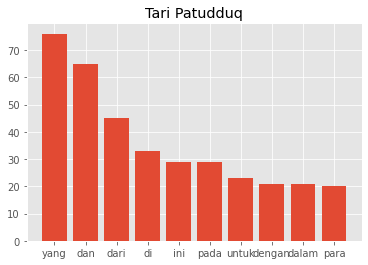

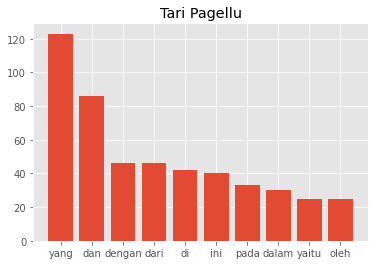

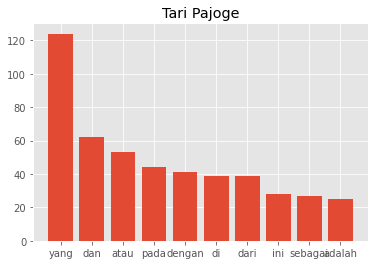

In [60]:
for label in df_dataset.label.unique():
  common_stopwords(label)

Each class or label, "yang" dominates which is followed by "dan".

### Analyzing punctuations

In [61]:
def analyze_punctuations(label):
  corpus = create_corpus(label)
  
  dict_result = defaultdict(int)

  special_char = string.punctuation

  for word in corpus:
    for char in special_char:
      if char in word:
        dict_result[char] += 1


  x, y = zip(*dict_result.items())
  plt.bar(x, y)
  plt.title(label)
  plt.show()

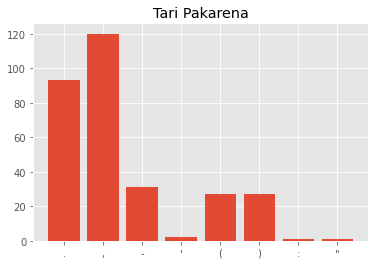

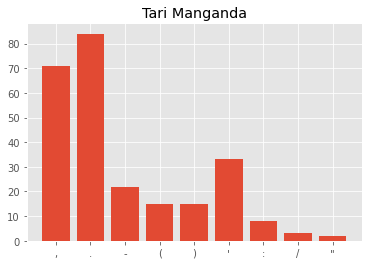

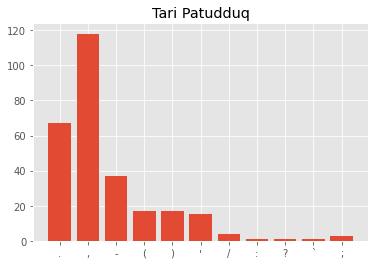

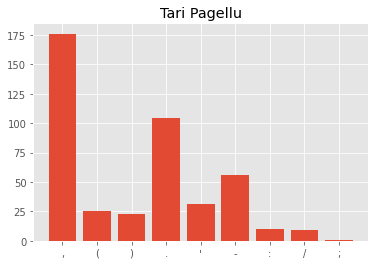

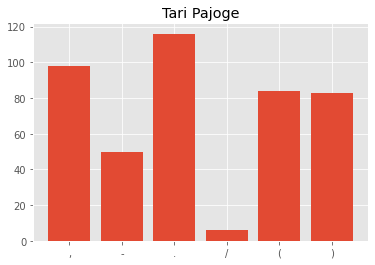

In [62]:
for label in df_dataset.label.unique():
  analyze_punctuations(label)

### Common words (not in stopwords)

In [81]:
def common_words(label):
  corpus = create_corpus(label)
  counter = Counter(corpus)
  most = counter.most_common()

  x = []
  y = []

  for word, count in most[:40]:
    if (word not in stopwords_id):
      x.append(word)
      y.append(count)

  sns.barplot(x=y, y=x)
  plt.title(label)
  plt.show()

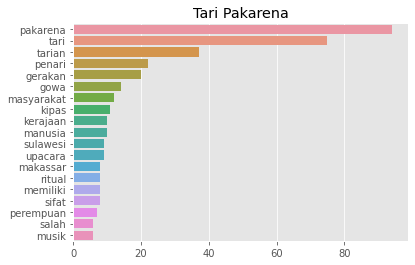

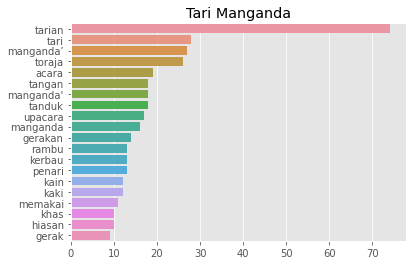

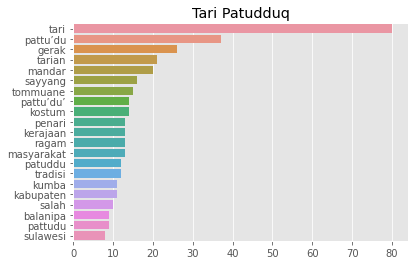

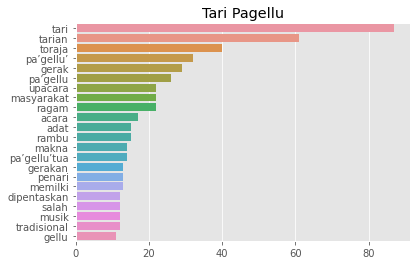

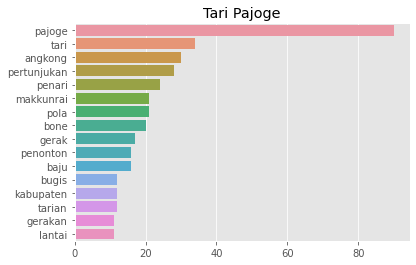

In [82]:
for label in df_dataset.label.unique():
  common_words(label)

### Ngram analysis

We will do a bigram (n=2) analysis over the sentences. Let's check the most common bigrams in sentences.

In [89]:
def get_top_sentences_bigrams(corpus, n=None):
  vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

<AxesSubplot:>

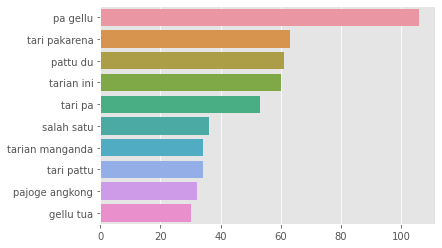

In [90]:
top_sentence_bigrams = get_top_sentences_bigrams(df_dataset['Kalimat'])[:10]
x, y = map(list, zip(*top_sentence_bigrams))
sns.barplot(x=y, y=x)

## Data Cleaning

We will do some basic cleaning such as remove stopwords, punctuations, and url.

### Removing urls

In [92]:
example = "Test sentences : https://www.sample.com/hello/world?search=Oh-Dance&type=App sample url"

def remove_url(text):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', text)

remove_url(example)

'Test sentences :  sample url'

In [95]:
df_dataset['Kalimat'] = df_dataset['Kalimat'].apply(lambda x : remove_url(x))

### Removing punctuations

In [96]:
def remove_punct(text):
  table = str.maketrans('','',string.punctuation)
  return text.translate(table)

example = "Contoh Tari Tradisional: 1) Tari Manganda, 2) Tari Patuddu', 3) Tari Pagellu."
print(remove_punct(example))

Contoh Tari Tradisional 1 Tari Manganda 2 Tari Patuddu 3 Tari Pagellu


In [97]:
df_dataset['Kalimat'] = df_dataset['Kalimat'].apply(lambda x: remove_punct(x))

### Removing stopwords

In [98]:
def remove_stopwords(text):
  final_text = []
  for word in text.split():
    if word.strip().lower() not in stopwords_id:
      final_text.append(word.strip().lower())
  return " ".join(final_text)

example = "Tari Pattudu dan Manganda adalah tari yang menarik"
print(remove_stopwords(example))

tari pattudu manganda tari menarik


In [100]:
df_dataset['Kalimat'] = df_dataset['Kalimat'].apply(lambda x: remove_stopwords(x))

## Split dataset

In [101]:
x_data = df_dataset['Kalimat']
# Change index label
new_idx_label = {
    'Tari Pakarena':0,
    'Tari Manganda':1,
    'Tari Patudduq':2,
    'Tari Pagellu':3,
    'Tari Pajoge':4
}
y_data = df_dataset['label'].map(new_idx_label)

In [102]:
# Let's split dataset into train and validation into subsets using a 80/20 ratio
# where each split retains the same distribution of the labels
# reference : https://stackoverflow.com/a/60804119
x_train, x_val, y_train, y_val = train_test_split(
    x_data,
    y_data,
    stratify=y_data,
    test_size=0.2,
    random_state=42
)


## Tokenize and Padding Data

In [106]:
# Max Length of sentences (count many words)
# In Train Dataset
maxlen_train = x_train.map(
    lambda x: len(x.split())
)

# In Val Dataset
maxlen_val = x_val.map(
    lambda x: len(x.split())
)

maxlen = maxlen_train.max()

if (maxlen_train.max() < maxlen_val.max()):
    maxlen = maxlen_val.max()

print(maxlen)


52


In [107]:
# Tokenize

tokenizer = Tokenizer(
    num_words=maxlen,
    oov_token='<OOV>'
)

# Fit on x_train not x_data (Still not sure)
# Reference: https://stackoverflow.com/a/54892165
tokenizer.fit_on_texts(x_train.values)
word_index = tokenizer.word_index
print(len(word_index)) 

1898


In [108]:
vocab_size = 10000 # arbitrarily chosen (max 61050)
embed_size = 32 # arbitrarily chosen
padding_type = 'post'

x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_val_sequences = tokenizer.texts_to_sequences(x_val)

x_train_pad = pad_sequences(
    x_train_sequences,
    padding=padding_type,
    maxlen=maxlen
)

x_val_pad = pad_sequences(
    x_val_sequences,
    padding=padding_type,
    maxlen=maxlen
)

In [109]:
text = "Tari Pakarena dari toraja"
result = tokenizer.texts_to_sequences([text])
print(result)
test_pad = pad_sequences(
    tokenizer.texts_to_sequences([text]),
    padding=padding_type,
    maxlen=maxlen
)
print(len(test_pad))
print(test_pad);

[[2, 4, 1, 7]]
1
[[2 4 1 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


## Define Model with LSTM Layers

In [226]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embed_size, input_length=maxlen))

# LSTM
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LSTM(64, return_sequences=True))
model.add(tf.keras.layers.LSTM(32, return_sequences=True))

# Pooling Layer decreases sensitivity to features, thereby creating more generalised data for better test results.
model.add(tf.keras.layers.GlobalMaxPooling1D())

# DNN
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Dropout(0.5)) #prevent the problem of overfitting
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Dropout(0.45))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dropout(0.35))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dropout(0.35))
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, 52, 32)            320000    
                                                                 
 lstm_66 (LSTM)              (None, 52, 128)           82432     
                                                                 
 lstm_67 (LSTM)              (None, 52, 64)            49408     
                                                                 
 lstm_68 (LSTM)              (None, 52, 32)            12416     
                                                                 
 global_max_pooling1d_24 (Gl  (None, 32)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_139 (Dense)           (None, 512)               16896     
                                                     

### Training Model

In [227]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['acc']
)

In [228]:
class callback_acc(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') > 0.995 or logs.get('val_acc') > 0.995):
      self.model.stop_training = True
    
callback_acc = callback_acc()
callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_acc', restore_best_weights=True, patience=20)

In [229]:
history = model.fit(
    x_train_pad,
    y_train.values,
    epochs=200,
    batch_size=8,
    validation_data=(x_val_pad, y_val.values),
    callbacks=[callback_acc, callback_es],
    verbose=1
)

Epoch 1/200
50/50 [==============================] - 10s 94ms/step - loss: 1.6116 - acc: 0.1995 - val_loss: 1.6090 - val_acc: 0.2000
Epoch 2/200
50/50 [==============================] - 3s 67ms/step - loss: 1.6080 - acc: 0.2096 - val_loss: 1.6088 - val_acc: 0.2000
Epoch 3/200
50/50 [==============================] - 3s 67ms/step - loss: 1.6118 - acc: 0.1995 - val_loss: 1.6083 - val_acc: 0.2000
Epoch 4/200
50/50 [==============================] - 4s 71ms/step - loss: 1.6088 - acc: 0.1944 - val_loss: 1.6073 - val_acc: 0.2800
Epoch 5/200
50/50 [==============================] - 3s 68ms/step - loss: 1.6101 - acc: 0.2096 - val_loss: 1.6051 - val_acc: 0.2200
Epoch 6/200
50/50 [==============================] - 3s 69ms/step - loss: 1.6048 - acc: 0.2247 - val_loss: 1.5980 - val_acc: 0.2800
Epoch 7/200
50/50 [==============================] - 3s 66ms/step - loss: 1.5972 - acc: 0.2475 - val_loss: 1.5851 - val_acc: 0.2600
Epoch 8/200
50/50 [==============================] - 3s 68ms/step - loss: 1

### Plot Accuracy and Lose

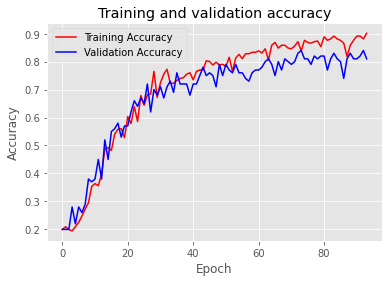

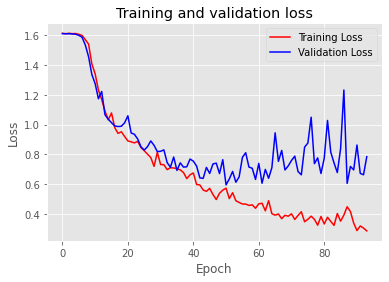

In [230]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Test Model

In [231]:
def test_model(text):

  labels = ['Tari Pakarena', 'Tari Manganda', 'Tari Patudduq', 'Tari Pagellu', 'Tari Pajoge']

  test_pad = pad_sequences(
      tokenizer.texts_to_sequences(text),
      padding=padding_type,
      maxlen=maxlen
  )

  test_prediction = model.predict(test_pad)
  list_test = labels[np.argmax(test_prediction)]

  print(
      "[text] : {}\n[topic] : {}".format(text[0], list_test)
  )

In [233]:
test_model(['Toraja'])

[text] : Toraja
[topic] : Tari Manganda


## Model Evaluation

<Figure size 432x288 with 0 Axes>

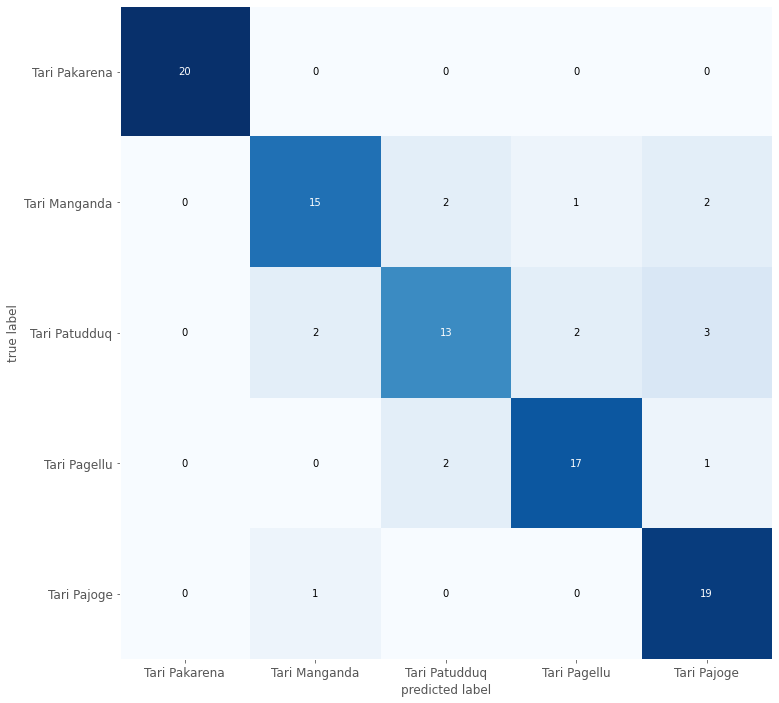

In [234]:
# Using validation data
# Due to the submission requirement of 20% of all data used for validation and others for training
# Reference : http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/

labels = ['Tari Pakarena', 'Tari Manganda', 'Tari Patudduq', 'Tari Pagellu', 'Tari Pajoge']
preds = [np.argmax(i) for i in model.predict(x_val_pad)]

cm  = confusion_matrix(y_val.values, preds)
plt.figure()
plot_confusion_matrix(cm, figsize=(16,12), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(5), labels, fontsize=12)
plt.yticks(range(5), labels, fontsize=12)
plt.show()

### Recall, Precision and Accuracy

In [235]:
# Using validation data
# Reference: https://scikit-learn.org/stable/modules/model_evaluation.html
print("Recall : {}".format(recall_score(y_val.values, preds, average='micro')))
print("Precision : {}".format(precision_score(y_val.values, preds, average='micro')))
print("Accuracy : {}".format(accuracy_score(y_val.values, preds)))

Recall : 0.84
Precision : 0.84
Accuracy : 0.84


## Extract Tokenize to JSON for Deployment
Referensi :  
- https://towardsdatascience.com/spam-classification-in-android-with-tensorflow-lite-cde417e81260
- https://stackoverflow.com/questions/56333294/converting-python-keras-nlp-model-to-tensorflowjs

In [236]:
with open('word-dict.json', 'w') as file:
  json.dump(tokenizer.word_index, file)

## Download Model

In [238]:
%pip install tensorflowjs

Note: you may need to restart the kernel to use updated packages.


In [240]:
# Specifies the model directory
model_dir = 'model'
try:
  os.mkdir(model_dir)
except OSError as e:
  print("\nUnable create directory. {}".format(e))

In [241]:
# Save model .h5
model_name = "model_nlp_ohdance_v02"
model.save(model_dir+f"/{model_name}.h5")

In [244]:
!tensorflowjs_converter --input_format=keras --output_format=tfjs_layers_model ./model/model_nlp_ohdance_v02.h5 ./model/tfjs_float_model

2022-01-27 17:19:13.203724: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-01-27 17:19:13.203946: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [246]:
!tensorflowjs_converter --quantize_uint8 --input_format=keras --output_format=tfjs_layers_model ./model/model_nlp_ohdance_v02.h5 ./model/tfjs_quant_model

2022-01-27 17:20:19.598903: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-01-27 17:20:19.599220: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
